## 6장 5절 서포트 벡터 머신(Support Vector Machine)

### 1. scikit-learn의 LinearSVC

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_class = pd.read_csv('./data/classification.csv')
df_class

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


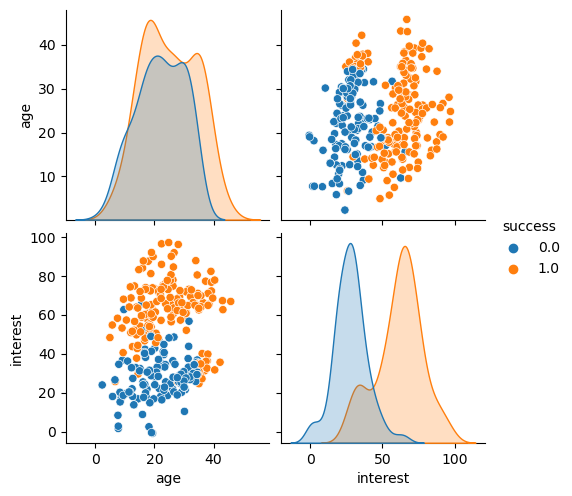

In [2]:
sns.pairplot(data=df_class, hue='success')

In [3]:
from sklearn.model_selection import train_test_split

df_x = df_class.iloc[:,:-1]
df_y = df_class['success']

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, stratify=df_y, train_size=0.7, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(207, 2) (90, 2) (207,) (90,)


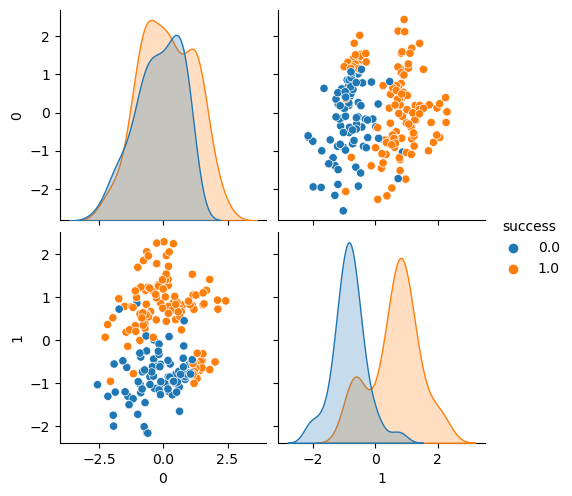

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)

sns.pairplot(data = pd.concat([pd.DataFrame(X_train_sc), y_train.reset_index(drop=True)], axis=1), hue='success')

In [5]:
from sklearn.svm import SVC

clf = SVC(C=0.5)
clf.fit(X_train_sc, y_train)

SVC(C=0.5)

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

X_test_sc = sc.transform(X_test)

pred = clf.predict(X_test_sc)

test_cm = confusion_matrix(y_true=y_test, y_pred=pred)
test_acc = accuracy_score(y_true=y_test, y_pred=pred)
test_prc = precision_score(y_true=y_test, y_pred=pred)
test_rcll = recall_score(y_true=y_test, y_pred=pred)
test_f1 = f1_score(y_true=y_test, y_pred=pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100, 2)))
print('정밀도\t{}%'.format(round(test_prc*100, 2)))
print('재현율\t{}%'.format(round(test_rcll*100, 2)))
print('F1\t{}%'.format(round(test_f1*100, 2)))

[[37  2]
 [ 2 49]]


정확도	95.56%
정밀도	96.08%
재현율	96.08%
F1	96.08%


C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


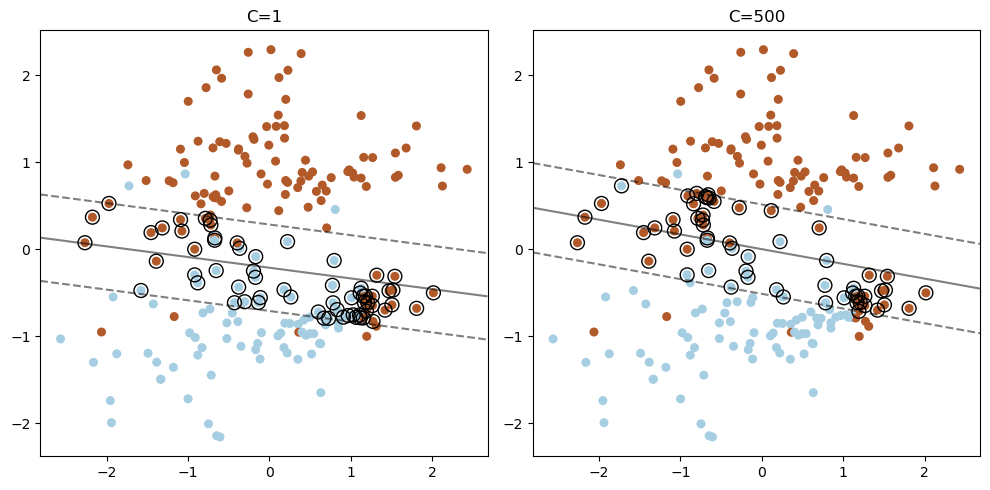

In [7]:
from sklearn.svm import LinearSVC

plt.figure(figsize=(10,5))

for i, C in enumerate([1, 500]):
    clf2 = LinearSVC(C=C, loss='hinge', random_state=42).fit(X_train_sc, y_train)
#     decision function으로 서포트 벡터 얻기
    decision_function = clf2.decision_function(X_train_sc)
    support_vector_indices = np.where(np.abs(decision_function)<=1+1e-15)[0]
    support_vectors = X_train_sc[support_vector_indices]
    
    plt.subplot(1, 2, i+1)
    plt.scatter(X_train_sc[:, 0], X_train_sc[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1],50), np.linspace(ylim[0], ylim[1], 50))
    
    Z=clf2.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:,1], s=100, linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C="+str(C))
    
plt.tight_layout()
plt.show()

### 2. scikit-learn의 SVR

In [8]:
import numpy as np

X = np.sort(5*np.random.rand(40,1), axis=0)
y = np.sin(X).ravel()

print(X[0:6], '\n\n', y[0:10])

[[0.39122702]
 [0.41130161]
 [0.43489514]
 [0.5051572 ]
 [0.64084794]
 [0.74783091]] 

 [0.38132301 0.39980273 0.42131531 0.48394501 0.59787536 0.68005006
 0.7231518  0.92449539 0.95446865 0.96829143]


In [9]:
y[::5] += 3 * (0.5 - np.random.rand(8))

print(y[0:10])

[-0.31056019  0.39980273  0.42131531  0.48394501  0.59787536 -0.49091275
  0.7231518   0.92449539  0.95446865  0.96829143]


In [10]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=0.1, coef0=1)

svr_rbf.fit(X,y)
svr_lin.fit(X,y)
svr_poly.fit(X,y)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [11]:
rbf_pred = svr_rbf.predict(X)
lin_pred = svr_lin.predict(X)
poly_pred = svr_poly.predict(X)

from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

preds = [rbf_pred, lin_pred, poly_pred]
kernel = ['Random_Forest', 'Linear', 'Polynomial']
evls = ['mse', 'rmse', 'mae']

results = pd.DataFrame(index = kernel, columns=evls)

for pred, nm in zip(preds, kernel):
    mse = mean_squared_error(y_true=y, y_pred=pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true=y, y_pred=pred)
    
    results.loc[nm]['mse'] = round(mse, 2)
    results.loc[nm]['rmse'] = round(rmse, 2)
    results.loc[nm]['mae'] = round(mae,2)
    
results
    

,mse,rmse,mae
Random_Forest,0.15,0.39,0.22
Linear,0.27,0.52,0.39
Polynomial,0.16,0.4,0.21
